In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

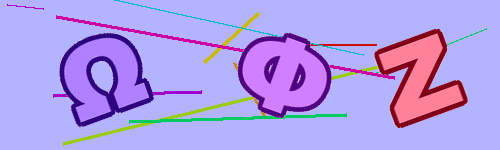

In [ ]:
Image.open('7.png')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###Stack Overflow

In [ ]:

# Load an color image in grayscale
img = cv2.imread('7.png',0)

#display image in window
#cv2.imshow('image',img) #@param - windowname, image to be displayed

horizontal_inv = cv2.bitwise_not(img)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(masked_img_inv,kernel,iterations = 3) # to remove blackline noise
cv2.imwrite("result1.jpg", dilation)
ret,thresh2 = cv2.threshold(dilation,254,255,cv2.THRESH_BINARY_INV)
thresh2=cv2.bitwise_not(thresh2)
# cv2.imshow("masked img", masked_img_inv)
cv2.imwrite("result2.jpg", thresh2)
cv2.waitKey(0) # time for window to show image in milliseconds - 0 is infinite wait
cv2.destroyAllWindows()

### Stack Exchange e.g.

In [ ]:
img = cv2.imread('0.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
ret,thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

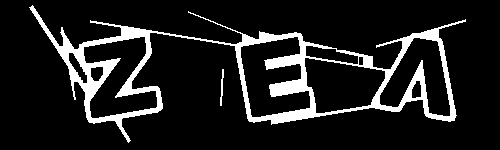

In [ ]:
cv2_imshow(morph_img)

###Try from Youtube e.g.

2


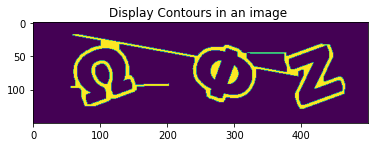

In [ ]:
img  = cv2.imread('7.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
contours,heirarchy = cv2.findContours(morph_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
for cnt in contours:
  rect = cv2.minAreaRect(cnt)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  img = cv2.drawContours(morph_img,[box],0,(0,255,0),3)
plt.figure('example 1 : ')
plt.imshow(img)
plt.title('Display Contours in an image ')
plt.show()

### Stack Overflow e.g.

In [ ]:
def bgremove3(myimage):
    # BG Remover 3
    myimage_hsv = cv2.cvtColor(myimage, cv2.COLOR_BGR2HSV)

    #Take S and remove any value that is less than half
    s = myimage_hsv[:,:,1]
    s = np.where(s < 127, 0, 1) # Any value below 127 will be excluded

    # We increase the brightness of the image and then mod by 255
    v = (myimage_hsv[:,:,2] + 127) % 255
    v = np.where(v > 127, 1, 0)  # Any value above 127 will be part of our mask

    # Combine our two masks based on S and V into a single "Foreground"
    foreground = np.where(s+v > 0, 1, 0).astype(np.uint8)  #Casting back into 8bit integer

    background = np.where(foreground==0,255,0).astype(np.uint8) # Invert foreground to get background in uint8
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)  # Convert background back into BGR space
    foreground=cv2.bitwise_and(myimage,myimage,mask=foreground) # Apply our foreground map to original image
    finalimage = 0+foreground # Combine foreground and background

    return finalimage

In [ ]:
img = cv2.imread('7.png')
res_img = bgremove3(img)

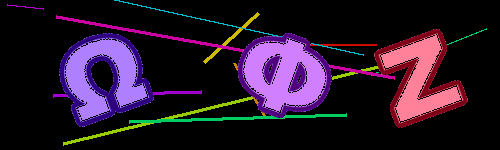

In [ ]:
cv2_imshow(res_img)

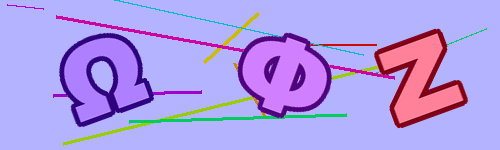

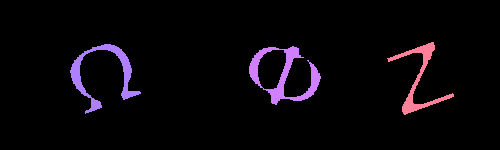

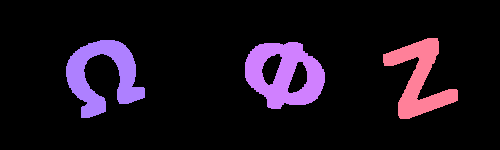

-1

In [ ]:

# Reading the input image
#img = cv2.imread('7.png', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

img_erosion = cv2.erode(res_img, kernel, iterations=2)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=2)

cv2_imshow(img)
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

cv2.waitKey(0)

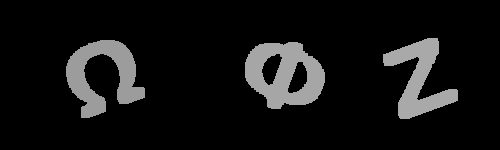

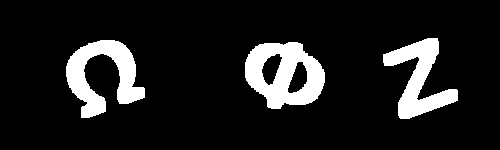

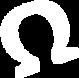

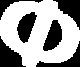

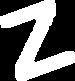

3


In [ ]:
img = cv2.cvtColor(img_dilation,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
#img = cv2.imread('0.png', 0)
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
cv2_imshow(img) #cv2.imshow("contours",img)
cv2.waitKey(0)
d=0
for ctr in contours:
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = img[y:y+h, x:x+w]
    cv2_imshow(roi) #cv2.imshow("contours",img)
    cv2.imwrite('character_%d.png'%d, roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    d+=1
print(d)